In [62]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data = json.load(open('acndata_sessions(1).json'))

In [64]:
df = pd.DataFrame(data["_items"])

In [65]:
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,60cbe90ef9af8b207905e60d,0039,"Wed, 02 Jun 2021 02:30:41 GMT","Wed, 02 Jun 2021 03:53:12 GMT","Wed, 02 Jun 2021 03:02:02 GMT",0.816,2_39_139_28_2021-06-02 02:30:40.573850,0002,CA-303,2-39-139-28,America/Los_Angeles,None,None
1,60cbe90ef9af8b207905e60e,0039,"Wed, 02 Jun 2021 03:11:42 GMT","Wed, 02 Jun 2021 04:17:55 GMT",None,49.072,2_39_81_4550_2021-06-02 03:11:17.513917,0002,11900388,2-39-81-4550,America/Los_Angeles,000009741,"[{'WhPerMile': 258, 'kWhRequested': 25.8, 'mil..."
2,60cbe90ef9af8b207905e60f,0039,"Wed, 02 Jun 2021 04:40:35 GMT","Wed, 02 Jun 2021 06:18:15 GMT","Wed, 02 Jun 2021 06:18:02 GMT",10.668,2_39_79_383_2021-06-02 04:40:35.114311,0002,CA-492,2-39-79-383,America/Los_Angeles,000001470,"[{'WhPerMile': 284, 'kWhRequested': 28.4, 'mil..."
3,60cd3a8ff9af8b228751eab0,0039,"Wed, 02 Jun 2021 14:43:00 GMT","Wed, 02 Jun 2021 15:31:18 GMT","Wed, 02 Jun 2021 15:23:37 GMT",1.888,2_39_125_21_2021-06-02 14:42:33.185464,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
4,60cd3a8ff9af8b228751eab1,0039,"Wed, 02 Jun 2021 15:22:50 GMT","Wed, 02 Jun 2021 15:43:01 GMT",None,11.590,2_39_81_4550_2021-06-02 15:22:26.301751,0002,11900388,2-39-81-4550,America/Los_Angeles,000009561,"[{'WhPerMile': 299, 'kWhRequested': 38.87, 'mi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,60f3769cf9af8b5d8686697c,0039,"Thu, 01 Jul 2021 21:28:42 GMT","Thu, 01 Jul 2021 23:06:25 GMT",None,60.148,2_39_81_4550_2021-07-01 21:28:27.706772,0002,11900388,2-39-81-4550,America/Los_Angeles,000004903,"[{'WhPerMile': 258, 'kWhRequested': 82.56, 'mi..."
443,60f3769cf9af8b5d8686697d,0039,"Thu, 01 Jul 2021 21:39:33 GMT","Thu, 01 Jul 2021 22:11:12 GMT","Thu, 01 Jul 2021 22:11:07 GMT",1.745,2_39_139_28_2021-07-01 21:39:22.327346,0002,CA-303,2-39-139-28,America/Los_Angeles,000015855,"[{'WhPerMile': 283, 'kWhRequested': 2.83, 'mil..."
444,60f3769cf9af8b5d8686697e,0039,"Thu, 01 Jul 2021 22:20:35 GMT","Thu, 01 Jul 2021 23:35:43 GMT","Thu, 01 Jul 2021 23:05:30 GMT",2.196,2_39_125_21_2021-07-01 22:20:24.317872,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
445,60f3769cf9af8b5d8686697f,0039,"Thu, 01 Jul 2021 23:12:03 GMT","Thu, 01 Jul 2021 23:45:52 GMT",None,16.412,2_39_81_4550_2021-07-01 23:11:55.190948,0002,11900388,2-39-81-4550,America/Los_Angeles,000009307,"[{'WhPerMile': 301, 'kWhRequested': 45.15, 'mi..."


In [66]:
connect_time = []

for i in range(0,len(df['connectionTime'])):
    connect_time.append(df['connectionTime'][i][17:25])

In [67]:
disconnect_time = []

for i in range(0,len(df['disconnectTime'])):
    disconnect_time.append(df['disconnectTime'][i][17:25])

In [68]:
done_charging = []

for i in range(0,len(df['doneChargingTime'])):
    if df['doneChargingTime'][i] != None:
        done_charging.append(df['doneChargingTime'][i][17:25])
    else:
        done_charging.append(None)

In [69]:
done_charging_dt = pd.to_datetime(done_charging)

In [70]:
done_charging_dt

DatetimeIndex(['2021-12-01 03:02:02',                 'NaT',
               '2021-12-01 06:18:02', '2021-12-01 15:23:37',
                               'NaT', '2021-12-01 19:25:23',
               '2021-12-01 18:38:14', '2021-12-01 19:51:04',
               '2021-12-01 00:28:58', '2021-12-01 16:52:32',
               ...
                               'NaT', '2021-12-01 21:55:25',
                               'NaT', '2021-12-01 21:54:16',
               '2021-12-01 22:30:38',                 'NaT',
               '2021-12-01 22:11:07', '2021-12-01 23:05:30',
                               'NaT', '2021-12-01 23:58:36'],
              dtype='datetime64[ns]', length=447, freq=None)

In [71]:
connect_time_dt = pd.to_datetime(connect_time)

In [72]:
connect_time_dt

DatetimeIndex(['2021-12-01 02:30:41', '2021-12-01 03:11:42',
               '2021-12-01 04:40:35', '2021-12-01 14:43:00',
               '2021-12-01 15:22:50', '2021-12-01 15:45:54',
               '2021-12-01 15:47:45', '2021-12-01 15:55:01',
               '2021-12-01 16:05:19', '2021-12-01 16:07:03',
               ...
               '2021-12-01 17:57:44', '2021-12-01 19:53:08',
               '2021-12-01 20:01:53', '2021-12-01 20:06:06',
               '2021-12-01 20:41:34', '2021-12-01 21:28:42',
               '2021-12-01 21:39:33', '2021-12-01 22:20:35',
               '2021-12-01 23:12:03', '2021-12-01 23:29:09'],
              dtype='datetime64[ns]', length=447, freq=None)

In [73]:
disconnect_time_dt = pd.to_datetime(disconnect_time)

In [74]:
charging_time = disconnect_time_dt - connect_time_dt

In [75]:
df['chargingTime'] = charging_time

In [76]:
df['disconnectTime'][11]

'Thu, 03 Jun 2021 00:05:44 GMT'

In [77]:
df['connectionTime'][11]

'Wed, 02 Jun 2021 21:11:20 GMT'

In [78]:
df['chargingTime'].max()

Timedelta('0 days 09:10:07')

In [79]:
overcharge_time = []

for i in range(0, len(done_charging_dt)):
    if done_charging_dt[i] != None:
        overcharge_time.append(disconnect_time_dt[i] - done_charging_dt[i])
    else:
        overcharge_time.append(None)

In [80]:
df['overchargeTime'] = overcharge_time

In [81]:
86400 + (df['overchargeTime'].astype('timedelta64[s]')[11])

1374.0

In [82]:
df['overchargeTime'][11]

Timedelta('-1 days +00:22:54')

In [83]:
overcharge_sec = []

for i in range(0,len(df['overchargeTime'].astype('timedelta64[D]'))):
    if (df['overchargeTime'].astype('timedelta64[D]')[i]) == -1.0:
        overcharge_sec.append((86400 + (df['overchargeTime'].astype('timedelta64[s]')[i])))
    else:
        overcharge_sec.append(df['overchargeTime'].astype('timedelta64[s]')[i])


#df['overchargeTime'].astype('timedelta64[D]')

In [84]:
df['overchargeTime (seconds)'] = overcharge_sec

In [85]:
df['overchargeTime (seconds)'].max()

86342.0

In [86]:
import datetime

str(datetime.timedelta(seconds=df['overchargeTime (seconds)'].max()))

'23:59:02'

In [87]:
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,chargingTime,overchargeTime,overchargeTime (seconds)
0,60cbe90ef9af8b207905e60d,0039,"Wed, 02 Jun 2021 02:30:41 GMT","Wed, 02 Jun 2021 03:53:12 GMT","Wed, 02 Jun 2021 03:02:02 GMT",0.816,2_39_139_28_2021-06-02 02:30:40.573850,0002,CA-303,2-39-139-28,America/Los_Angeles,None,None,0 days 01:22:31,0 days 00:51:10,3070.0
1,60cbe90ef9af8b207905e60e,0039,"Wed, 02 Jun 2021 03:11:42 GMT","Wed, 02 Jun 2021 04:17:55 GMT",None,49.072,2_39_81_4550_2021-06-02 03:11:17.513917,0002,11900388,2-39-81-4550,America/Los_Angeles,000009741,"[{'WhPerMile': 258, 'kWhRequested': 25.8, 'mil...",0 days 01:06:13,NaT,NaN
2,60cbe90ef9af8b207905e60f,0039,"Wed, 02 Jun 2021 04:40:35 GMT","Wed, 02 Jun 2021 06:18:15 GMT","Wed, 02 Jun 2021 06:18:02 GMT",10.668,2_39_79_383_2021-06-02 04:40:35.114311,0002,CA-492,2-39-79-383,America/Los_Angeles,000001470,"[{'WhPerMile': 284, 'kWhRequested': 28.4, 'mil...",0 days 01:37:40,0 days 00:00:13,13.0
3,60cd3a8ff9af8b228751eab0,0039,"Wed, 02 Jun 2021 14:43:00 GMT","Wed, 02 Jun 2021 15:31:18 GMT","Wed, 02 Jun 2021 15:23:37 GMT",1.888,2_39_125_21_2021-06-02 14:42:33.185464,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",0 days 00:48:18,0 days 00:07:41,461.0
4,60cd3a8ff9af8b228751eab1,0039,"Wed, 02 Jun 2021 15:22:50 GMT","Wed, 02 Jun 2021 15:43:01 GMT",None,11.590,2_39_81_4550_2021-06-02 15:22:26.301751,0002,11900388,2-39-81-4550,America/Los_Angeles,000009561,"[{'WhPerMile': 299, 'kWhRequested': 38.87, 'mi...",0 days 00:20:11,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,60f3769cf9af8b5d8686697c,0039,"Thu, 01 Jul 2021 21:28:42 GMT","Thu, 01 Jul 2021 23:06:25 GMT",None,60.148,2_39_81_4550_2021-07-01 21:28:27.706772,0002,11900388,2-39-81-4550,America/Los_Angeles,000004903,"[{'WhPerMile': 258, 'kWhRequested': 82.56, 'mi...",0 days 01:37:43,NaT,NaN
443,60f3769cf9af8b5d8686697d,0039,"Thu, 01 Jul 2021 21:39:33 GMT","Thu, 01 Jul 2021 22:11:12 GMT","Thu, 01 Jul 2021 22:11:07 GMT",1.745,2_39_139_28_2021-07-01 21:39:22.327346,0002,CA-303,2-39-139-28,America/Los_Angeles,000015855,"[{'WhPerMile': 283, 'kWhRequested': 2.83, 'mil...",0 days 00:31:39,0 days 00:00:05,5.0
444,60f3769cf9af8b5d8686697e,0039,"Thu, 01 Jul 2021 22:20:35 GMT","Thu, 01 Jul 2021 23:35:43 GMT","Thu, 01 Jul 2021 23:05:30 GMT",2.196,2_39_125_21_2021-07-01 22:20:24.317872,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",0 days 01:15:08,0 days 00:30:13,1813.0
445,60f3769cf9af8b5d8686697f,0039,"Thu, 01 Jul 2021 23:12:03 GMT","Thu, 01 Jul 2021 23:45:52 GMT",None,16.412,2_39_81_4550_2021-07-01 23:11:55.190948,0002,11900388,2-39-81-4550,America/Los_Angeles,000009307,"[{'WhPerMile': 301, 'kWhRequested': 45.15, 'mi...",0 days 00:33:49,NaT,NaN


In [88]:
df['overchargeTime (hours)'] = (df['overchargeTime (seconds)'] / 3600)

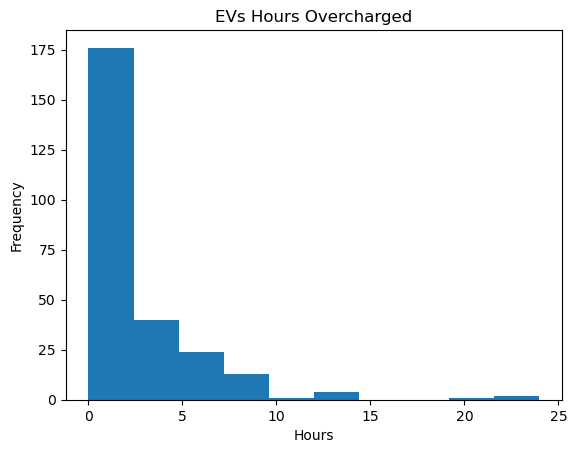

In [89]:
df['overchargeTime (hours)'].plot.hist()
plt.title('EVs Hours Overcharged')
plt.xlabel('Hours')
plt.show()

In [90]:
df['overchargeTime'].astype('timedelta64[s]')[11] + 86400

1374.0

In [91]:
df['chargingTime'].astype('timedelta64[s]')[11] +86400

10464.0

In [92]:
staytime = []

for i in range(0,len(df['chargingTime'].astype('timedelta64[D]'))):
    if (df['chargingTime'].astype('timedelta64[D]')[i]) == -1.0:
        staytime.append((86400 + (df['chargingTime'].astype('timedelta64[s]')[i])))
    else:
        staytime.append(df['chargingTime'].astype('timedelta64[s]')[i])


In [93]:
df['Stay Time (seconds)'] = staytime

In [94]:
df['Stay Time (hours)'] = (df['Stay Time (seconds)'] / 3600)

In [95]:
df['overchargeTime (hours)'].max()

23.983888888888888

In [96]:
df['Stay Time (hours)'].max()

18.72138888888889

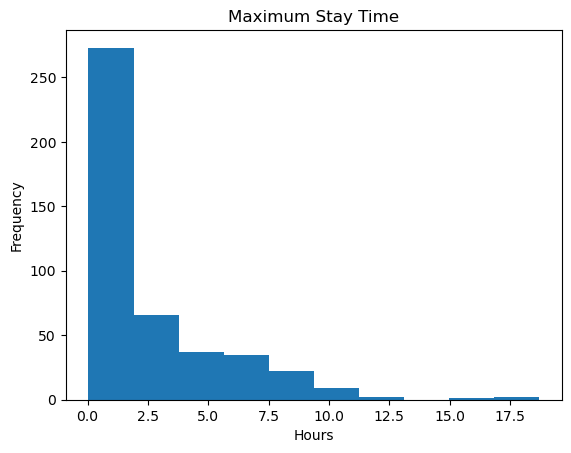

In [97]:
df['Stay Time (hours)'].plot.hist()
plt.title('Maximum Stay Time')
plt.xlabel('Hours')
plt.show()

In [98]:
df['userInputs'][1][0]['milesRequested']

100

In [99]:
miles_per_wh = []

for i in range(0,len(df['userInputs'])):
    if df['userInputs'][i] != None:
         miles_per_wh.append(df['userInputs'][i][0]['WhPerMile'])
    else:        
        miles_per_wh.append(None)

In [100]:
watts_del = []

for i in range(0,len(df['kWhDelivered'])):
    watts_del.append((df['kWhDelivered'][i]) * 1000)


In [101]:
miles_until_charge = []

for i in range(0, len(df)):
    if miles_per_wh[i] != None:
        miles_until_charge.append(watts_del[i] / miles_per_wh[i])
    else:
        miles_until_charge.append(None)

In [102]:
df['Miles Until Charge'] = miles_until_charge

In [103]:
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,chargingTime,overchargeTime,overchargeTime (seconds),overchargeTime (hours),Stay Time (seconds),Stay Time (hours),Miles Until Charge
0,60cbe90ef9af8b207905e60d,0039,"Wed, 02 Jun 2021 02:30:41 GMT","Wed, 02 Jun 2021 03:53:12 GMT","Wed, 02 Jun 2021 03:02:02 GMT",0.816,2_39_139_28_2021-06-02 02:30:40.573850,0002,CA-303,2-39-139-28,America/Los_Angeles,None,None,0 days 01:22:31,0 days 00:51:10,3070.0,0.852778,4951.0,1.375278,NaN
1,60cbe90ef9af8b207905e60e,0039,"Wed, 02 Jun 2021 03:11:42 GMT","Wed, 02 Jun 2021 04:17:55 GMT",None,49.072,2_39_81_4550_2021-06-02 03:11:17.513917,0002,11900388,2-39-81-4550,America/Los_Angeles,000009741,"[{'WhPerMile': 258, 'kWhRequested': 25.8, 'mil...",0 days 01:06:13,NaT,NaN,NaN,3973.0,1.103611,190.201550
2,60cbe90ef9af8b207905e60f,0039,"Wed, 02 Jun 2021 04:40:35 GMT","Wed, 02 Jun 2021 06:18:15 GMT","Wed, 02 Jun 2021 06:18:02 GMT",10.668,2_39_79_383_2021-06-02 04:40:35.114311,0002,CA-492,2-39-79-383,America/Los_Angeles,000001470,"[{'WhPerMile': 284, 'kWhRequested': 28.4, 'mil...",0 days 01:37:40,0 days 00:00:13,13.0,0.003611,5860.0,1.627778,37.563380
3,60cd3a8ff9af8b228751eab0,0039,"Wed, 02 Jun 2021 14:43:00 GMT","Wed, 02 Jun 2021 15:31:18 GMT","Wed, 02 Jun 2021 15:23:37 GMT",1.888,2_39_125_21_2021-06-02 14:42:33.185464,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",0 days 00:48:18,0 days 00:07:41,461.0,0.128056,2898.0,0.805000,5.394286
4,60cd3a8ff9af8b228751eab1,0039,"Wed, 02 Jun 2021 15:22:50 GMT","Wed, 02 Jun 2021 15:43:01 GMT",None,11.590,2_39_81_4550_2021-06-02 15:22:26.301751,0002,11900388,2-39-81-4550,America/Los_Angeles,000009561,"[{'WhPerMile': 299, 'kWhRequested': 38.87, 'mi...",0 days 00:20:11,NaT,NaN,NaN,1211.0,0.336389,38.762542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,60f3769cf9af8b5d8686697c,0039,"Thu, 01 Jul 2021 21:28:42 GMT","Thu, 01 Jul 2021 23:06:25 GMT",None,60.148,2_39_81_4550_2021-07-01 21:28:27.706772,0002,11900388,2-39-81-4550,America/Los_Angeles,000004903,"[{'WhPerMile': 258, 'kWhRequested': 82.56, 'mi...",0 days 01:37:43,NaT,NaN,NaN,5863.0,1.628611,233.131783
443,60f3769cf9af8b5d8686697d,0039,"Thu, 01 Jul 2021 21:39:33 GMT","Thu, 01 Jul 2021 22:11:12 GMT","Thu, 01 Jul 2021 22:11:07 GMT",1.745,2_39_139_28_2021-07-01 21:39:22.327346,0002,CA-303,2-39-139-28,America/Los_Angeles,000015855,"[{'WhPerMile': 283, 'kWhRequested': 2.83, 'mil...",0 days 00:31:39,0 days 00:00:05,5.0,0.001389,1899.0,0.527500,6.166078
444,60f3769cf9af8b5d8686697e,0039,"Thu, 01 Jul 2021 22:20:35 GMT","Thu, 01 Jul 2021 23:35:43 GMT","Thu, 01 Jul 2021 23:05:30 GMT",2.196,2_39_125_21_2021-07-01 22:20:24.317872,0002,CA-311,2-39-125-21,America/Los_Angeles,000001746,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",0 days 01:15:08,0 days 00:30:13,1813.0,0.503611,4508.0,1.252222,6.274286
445,60f3769cf9af8b5d8686697f,0039,"Thu, 01 Jul 2021 23:12:03 GMT","Thu, 01 Jul 2021 23:45:52 GMT",None,16.412,2_39_81_4550_2021-07-01 23:11:55.190948,0002,11900388,2-39-81-4550,America/Los_Angeles,000009307,"[{'WhPerMile': 301, 'kWhRequested': 45.15, 'mi...",0 days 00:33:49,NaT,NaN,NaN,2029.0,0.563611,54.524917


In [104]:
cluster_df = pd.DataFrame()

In [105]:
cluster_df['Stay Time'] = df['Stay Time (hours)']
cluster_df['Overcharge Time'] = df['overchargeTime (hours)']
cluster_df['Miles Until Charge'] = df['Miles Until Charge']

In [106]:
cluster_df = cluster_df.fillna(0)
cluster_df

,Stay Time,Overcharge Time,Miles Until Charge
0,1.375278,0.852778,0.000000
1,1.103611,0.000000,190.201550
2,1.627778,0.003611,37.563380
3,0.805000,0.128056,5.394286
4,0.336389,0.000000,38.762542
...,...,...,...
442,1.628611,0.000000,233.131783
443,0.527500,0.001389,6.166078
444,1.252222,0.503611,6.274286
445,0.563611,0.000000,54.524917


In [107]:
cluster_df['Overcharge Time'][1]

0.0

In [108]:
for i in range(0,len(cluster_df['Overcharge Time'])):
    if cluster_df['Overcharge Time'][i] == 0.0 or cluster_df['Miles Until Charge'][i] == 0.0:
        cluster_df = cluster_df.drop([i])


In [109]:
cluster_df

,Stay Time,Overcharge Time,Miles Until Charge
2,1.627778,0.003611,37.563380
3,0.805000,0.128056,5.394286
5,6.220556,2.562500,18.644118
6,2.843889,0.002500,16.762238
7,3.936389,0.002222,26.209677
...,...,...,...
440,3.848889,2.046111,36.919355
441,3.055000,1.237222,37.304196
443,0.527500,0.001389,6.166078
444,1.252222,0.503611,6.274286


In [115]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [111]:
kmeans = KMeans(n_clusters=3).fit(cluster_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[  4.64880247   2.45255556  44.59901483]
 [  7.49979167   1.36760417 126.75126166]
 [  3.56905065   2.19406046  15.23723768]]


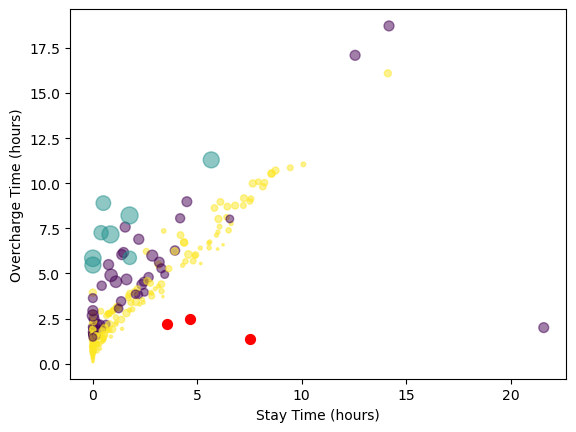

In [146]:
plt.scatter(cluster_df['Overcharge Time'], cluster_df['Stay Time'], c= kmeans.labels_.astype(float), s=cluster_df['Miles Until Charge'], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Stay Time (hours)')
plt.ylabel('Overcharge Time (hours)')
plt.show()

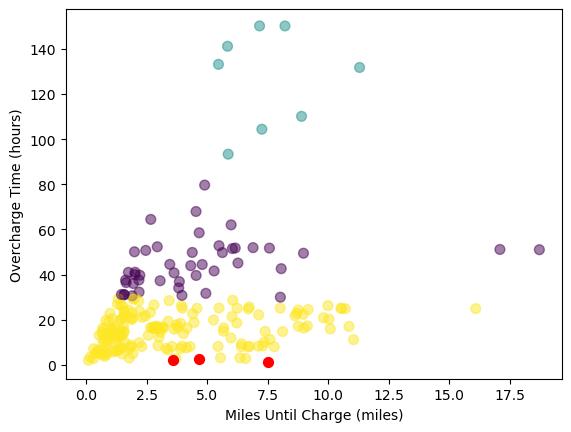

In [147]:
plt.scatter(cluster_df['Stay Time'], cluster_df['Miles Until Charge'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Miles Until Charge (miles)')
plt.ylabel('Overcharge Time (hours)')
plt.show()

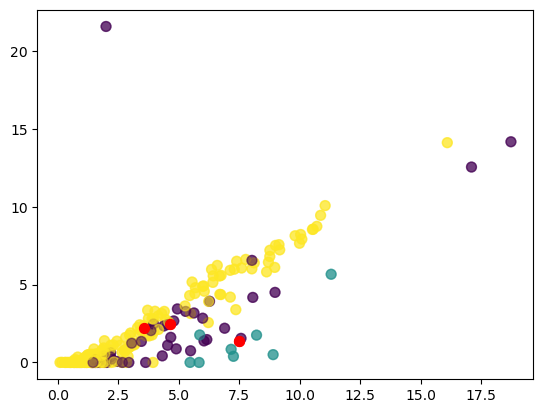

In [124]:
plt.scatter(cluster_df['Stay Time'], cluster_df['Overcharge Time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

16.696991019279746

In [125]:
def best_fit_slope(xs,ys):
    m = (((cluster_df['Overcharge Time'].mean()* cluster_df['Stay Time'].mean()) - (cluster_df['Overcharge Time'] * cluster_df['Stay Time']).mean())/((cluster_df['Overcharge Time'].mean()*cluster_df['Overcharge Time'].mean()) - (cluster_df['Overcharge Time'] * cluster_df['Overcharge Time'].mean())))
    return m

m = best_fit_slope(cluster_df['Overcharge Time'],cluster_df['Stay Time']

SyntaxError: unexpected EOF while parsing (<ipython-input-125-0e3f3f975b30>, line 6)

In [127]:
m.mean()

-1.773091293426533

In [137]:
def flexibility(stay_time, overcharge_time, miles_until_charge):
    if stay_time <= 7 and overcharge_time >= 5 and overcharge_time <= 12.5 and miles_until_charge >= 75 and miles_until_charge <= 150:
        print('High Flexibility')
    elif stay_time <= 2.5 + 1.77309*(overcharge_time) and miles_until_charge < 25:
        print('Low Flexibility')
    elif stay_time > 2.5 + 1.77309*(overcharge_time) and miles_until_charge >= 25 and miles_until_charge < 75:
        print('Medium Flexibility')
    else:
        print('Conditions out of Bounds')
    

In [139]:
flexibility(1,3,5)

Low Flexibility
